# Personalized Medicine - Redefining Cancer Treatment

<a id="Index"></a>
<br>
<p style="text-align: center;"><font size=4><b> INDEX </b></font></p>

|<p style="text-align: center;">1. [Exploring Data](#Exploring_Data)</p>|<p style="text-align: center;">2. [Feature Engineering](#Feature_Engineering)</p>|<p style="text-align: center;">3. [H2O Deep Learning](#H2O_Deep_Learning)</p>|
|-------------------------|-------------------------|-------------------------|
|<p style="text-align: center;">1.1 [Importing Data](#Importing_Data)</p>|<p style="text-align: center;">2.1 [Text](#Text)</p>|<p style="text-align: center;">3.1 [Model Training](#Model_Training)</p>|
|<p style="text-align: center;">1.2 [Understand Your Data](#Understanding_Data)</p>|<p style="text-align: center;">2.2 [Variation](#Variation)</p>|<p style="text-align: center;">3.2 [Making Predictions](#Making_Predictions)</p>|
|<p style="text-align: center;">1.2 [Cleaning Data](#Cleaning_Data)</p>|<p style="text-align: center;">2.3 [Gene](#Gene)</p>||

***
<a id="Exploring_Data"></a>
<div class="alert alert-block alert-info"><font size=6><b>1. Exploring Data</b></font></div>

<a id="Importing_Data"></a>
### Importing Data

In [1]:
import pandas as pd # for data processing
import numpy as np # for algebra
import seaborn as sns # for data visualization

import matplotlib.pyplot as plt #for data visualization
%matplotlib inline

import sklearn

import re
from re import * # for regular expressions

# Load the train and test datasets to create four DataFrames
# trainvar = pd.read_csv("input/training_variants")
# traintxt = pd.read_csv("input/training_text", sep="\|\|", engine="python", skiprows=1, names=["ID","Text"])
# testvar = pd.read_csv("input/test_variants")
# testtxt = pd.read_csv("input/test_text", sep="\|\|", engine="python", skiprows=1, names=["ID","Text"])

In [4]:
# traindf = pd.merge(trainvar, traintxt, how='left', on='ID').fillna('')
# testdf = pd.merge(testvar, testtxt, how='left', on='ID').fillna('')

In [5]:
trainvar.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [6]:
traintxt.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [7]:
testvar.head()

,ID,Gene,Variation
0,0,ACSL4,R570S
1,1,NAGLU,P521L
2,2,PAH,L333F
3,3,ING1,A148D
4,4,TMEM216,G77A


In [8]:
testtxt.head()

,ID,Text
0,0,2. This mutation resulted in a myeloproliferat...
1,1,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,Vascular endothelial growth factor receptor (V...
3,3,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,Abstract Retinoblastoma is a pediatric retina...


<a id="Understanding_Data"></a>
### Understand your data

In [9]:
print("trainvar:\n", trainvar.describe(),
      "\n\ntraintxt:\n", traintxt.describe(),
      "\n\ntestvar:\n", testvar.describe(),
      "\n\ntesttxt:\n", testtxt.describe())

trainvar:
                 ID        Class
count  3321.000000  3321.000000
mean   1660.000000     4.365854
std     958.834449     2.309781
min       0.000000     1.000000
25%     830.000000     2.000000
50%    1660.000000     4.000000
75%    2490.000000     7.000000
max    3320.000000     9.000000 

traintxt:
                 ID
count  3321.000000
mean   1660.000000
std     958.834449
min       0.000000
25%     830.000000
50%    1660.000000
75%    2490.000000
max    3320.000000 

testvar:
                 ID
count  5668.000000
mean   2833.500000
std    1636.354994
min       0.000000
25%    1416.750000
50%    2833.500000
75%    4250.250000
max    5667.000000 

testtxt:
                 ID
count  5668.000000
mean   2833.500000
std    1636.354994
min       0.000000
25%    1416.750000
50%    2833.500000
75%    4250.250000
max    5667.000000


In [10]:
print("For training data, there are a total of:\n",
      len(trainvar.ID.unique()), "IDs;\n",
      len(trainvar.Gene.unique()), "unique genes;\n",
      len(trainvar.Variation.unique()), "unique variations;\n", 
      len(trainvar.Class.unique()), "classes.")

For training data, there are a total of:
 3321 IDs;
 264 unique genes;
 2996 unique variations;
 9 classes.


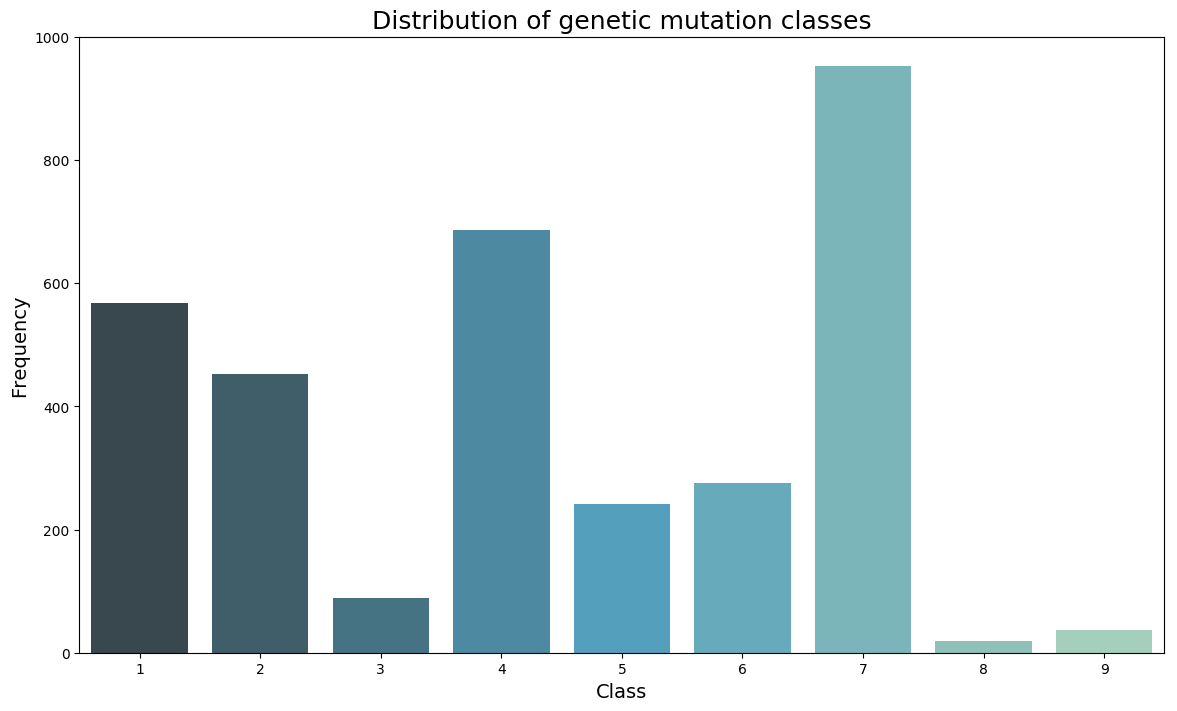

In [49]:
plt.figure(figsize=(14,8))
sns.countplot(x="Class", data=trainvar, palette="GnBu_d")
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.title("Distribution of genetic mutation classes", fontsize=18)
plt.show()

In [14]:
gene_freq = trainvar.groupby("Gene")["Gene"].count()
print("Genes with most occurences:\n", gene_freq.sort_values(ascending=False)[:10])
print("\nGenes with less occurences:\n", gene_freq.sort_values(ascending=True)[:10])

Genes with most occurences:
 Gene
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
Name: Gene, dtype: int64

Genes with less occurences:
 Gene
KLF4      1
FGF19     1
FANCC     1
FAM58A    1
PAK1      1
ERRFI1    1
PAX8      1
PIK3R3    1
PMS1      1
PPM1D     1
Name: Gene, dtype: int64


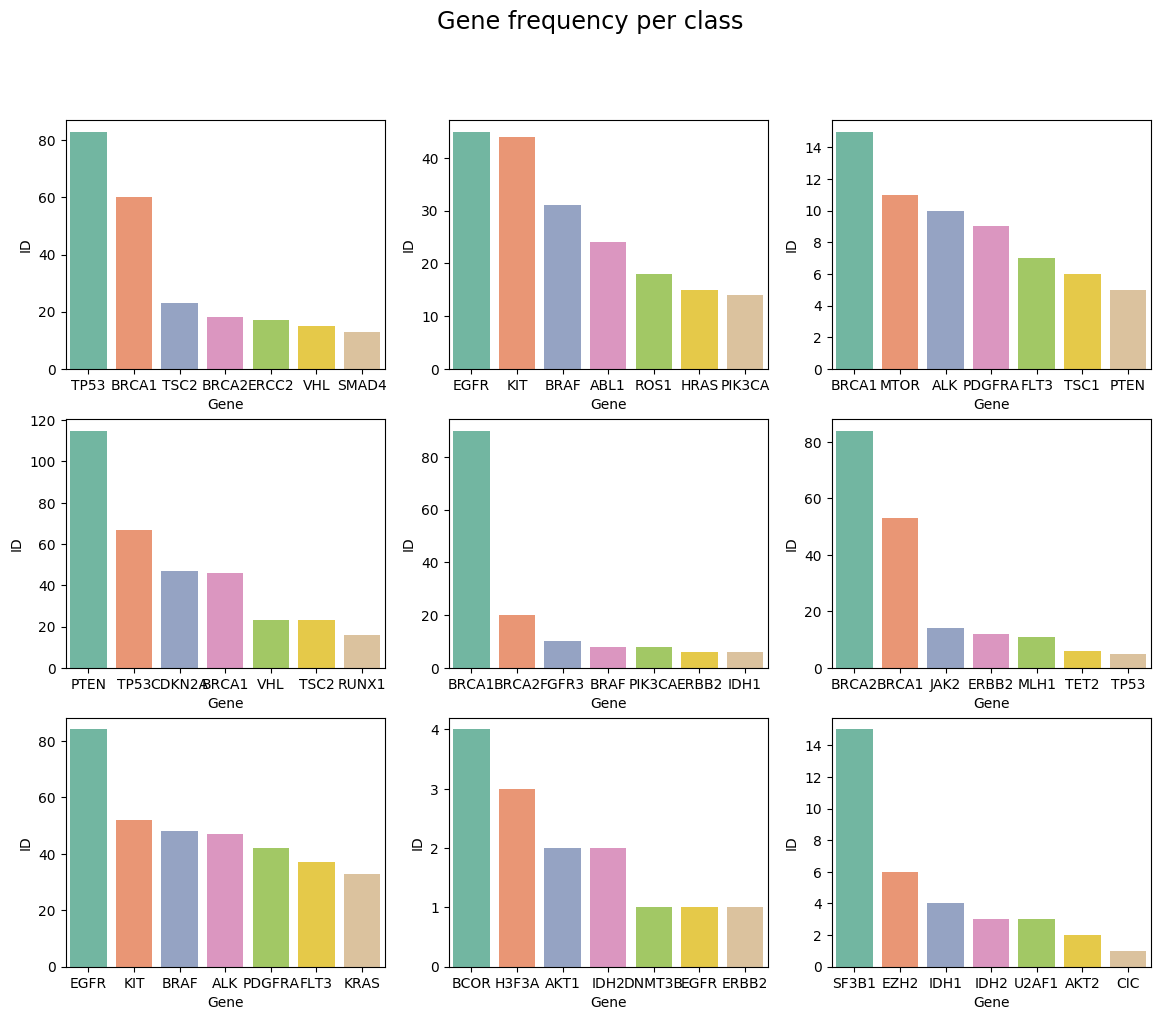

In [48]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(14,11))
fig.suptitle("Gene frequency per class", fontsize="xx-large")

for i in range(3):
    for j in range(3):
        gene_count_grp = trainvar[trainvar["Class"]==((i*3+j)+1)].groupby("Gene")["ID"].count().reset_index()
        sorted_gene_list_top_7 = gene_count_grp.sort_values("ID", ascending=False)[:7]
        sns.barplot(x="Gene", y="ID", data = sorted_gene_list_top_7, ax=axs[i][j], palette="Set2")
        
        #atribuir uma cor a cada gene

### Moving on to the text data

Adding a Text_count column:

In [17]:
traintxt.loc[:, 'Text_count'] = traintxt["Text"].apply(lambda x: len(x.split()))
traintxt.head()

,ID,Text,Text_count
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,6089
1,1,Abstract Background Non-small cell lung canc...,5722
2,2,Abstract Background Non-small cell lung canc...,5722
3,3,Recent evidence has demonstrated that acquired...,5572
4,4,Oncogenic mutations in the monomeric Casitas B...,6202


The Text_count column counts the number of characters in the correspondent Text.

### Combining both train DataFrames

In [19]:
train = pd.merge(trainvar, traintxt, how='left', on='ID').fillna('')
train.head()

,ID,Gene,Variation,Class,Text,Text_count
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,6089
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,5722
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,5722
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,5572
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,6202


In [20]:
count_class = train.groupby("Class")["Text_count"]
count_class.describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
1,568.0,9444.705986,6513.636387,1.0,4970.00,7286.5,12868.25,52970.0
2,452.0,9306.362832,7624.322787,116.0,4184.25,6810.0,12209.50,61923.0
3,89.0,6751.157303,3724.432760,1737.0,4283.00,5572.0,7415.00,27371.0
4,686.0,8978.202624,7276.259637,53.0,4566.00,6351.0,11521.75,43893.0
5,242.0,7504.462810,3890.263510,183.0,5245.00,6451.0,9513.50,24214.0
6,275.0,7143.069091,3827.975473,1.0,4505.50,6587.0,7626.00,24597.0
7,953.0,11437.911857,10105.202594,1.0,4871.00,8254.0,14620.00,76708.0
8,19.0,10810.105263,5645.073662,2111.0,5586.00,11237.0,15535.00,20612.0
9,37.0,12798.567568,10208.668344,1146.0,4942.00,10917.0,15797.00,45126.0


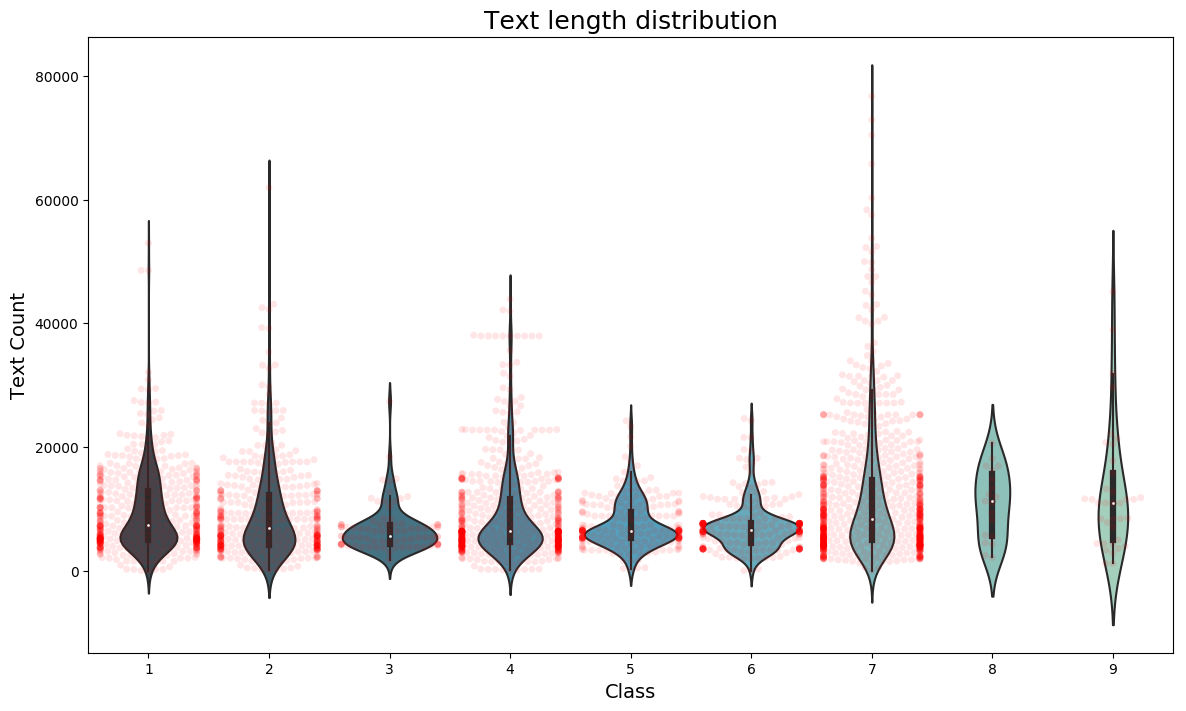

In [47]:
plt.figure(figsize=(14,8))
sns.violinplot(x="Class", y="Text_count", data=train, palette="GnBu_d")
sns.swarmplot(x="Class", y="Text_count", data=train, color="r", alpha=0.10)
plt.ylabel("Text Count", fontsize=14)
plt.xlabel("Class", fontsize=14)
plt.title("Text length distribution", fontsize=18)
plt.show()

Through this Violin Plot, we can infer that most of the text in all the classes have between 0 and 20000 characters.

We can also check in the "min" column of Class 1, Class 6 and Class 7 that there are some entries with Text Count = 1. Lets take a closer look at those entries and see what's going on.

In [22]:
train[train["Text_count"]==1.0]

,ID,Gene,Variation,Class,Text,Text_count
1109,1109,FANCA,S1088F,1,null,1
1277,1277,ARID5B,Truncating Mutations,1,null,1
1407,1407,FGFR3,K508M,6,null,1
1639,1639,FLT1,Amplification,6,null,1
2755,2755,BRAF,G596C,7,null,1


Scientific terminology and stop words: Most scientific papers have a common style of language that will be reasonably homogeneous throughout the text files. Words like “result” or “discuss” will be frequent without necessarily containing any signal for our prediction goal. Therefore, below we'll define our own list of additional stop words.

Paper notation quirks: Converting the paper text straight to ascii leads to a number of artefacts. None of those will have a big impact individually, but together they might reduce the accuracy of the analysis:
     - Citation numbers (as used e.g. by Nature magazine) are attached to the corresponding word
     - Occasionally, there are webpage navigation commands like “SectionNext” embedded in the text
     - Author names and affiliations are occasionally included

### Counting the number of Variation occurences in Text:

In [25]:
def varcount(df): #returns a dict of the frequency of the Variation in the correspondent Text
    varcnt = dict()
    for i in range(len(df)):
        a = re.findall(df.loc[i,"Variation"],df.loc[i,"Text"],re.M) #re.findall(pattern, text, multiline)
        varcnt[i] = len(a)
    return varcnt

In [26]:
varcnt_df = pd.DataFrame(list(varcount(train).items()), columns=['ID','VarCount'])
train = pd.merge(train, varcnt_df, how='outer', on='ID').fillna('')
train.head()

,ID,Gene,Variation,Class,Text,Text_count,VarCount
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,6089,0
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,5722,13
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,5722,13
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,5572,5
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,6202,2


### Creating a function that picks the most common words in the "Text" of the df

In [27]:
from collections import Counter

def most_common_words(df):
    c = Counter()
    for row in range(len(df["Text"])):
        c += Counter(df["Text"][row].split())
    return c

In [69]:
import operator

word_list_top_25 = dict(most_common_words(train).most_common(25))
sorted_word_list_top_25 = sorted(word_list_top_25.items(), key=operator.itemgetter(1), reverse=True)
topwords = dict(sorted_word_list_top_25)
word_counts = topwords.values()

In [70]:
wordlist = []
for i in sorted_word_list_top_25:
    wordlist.append(i[0])

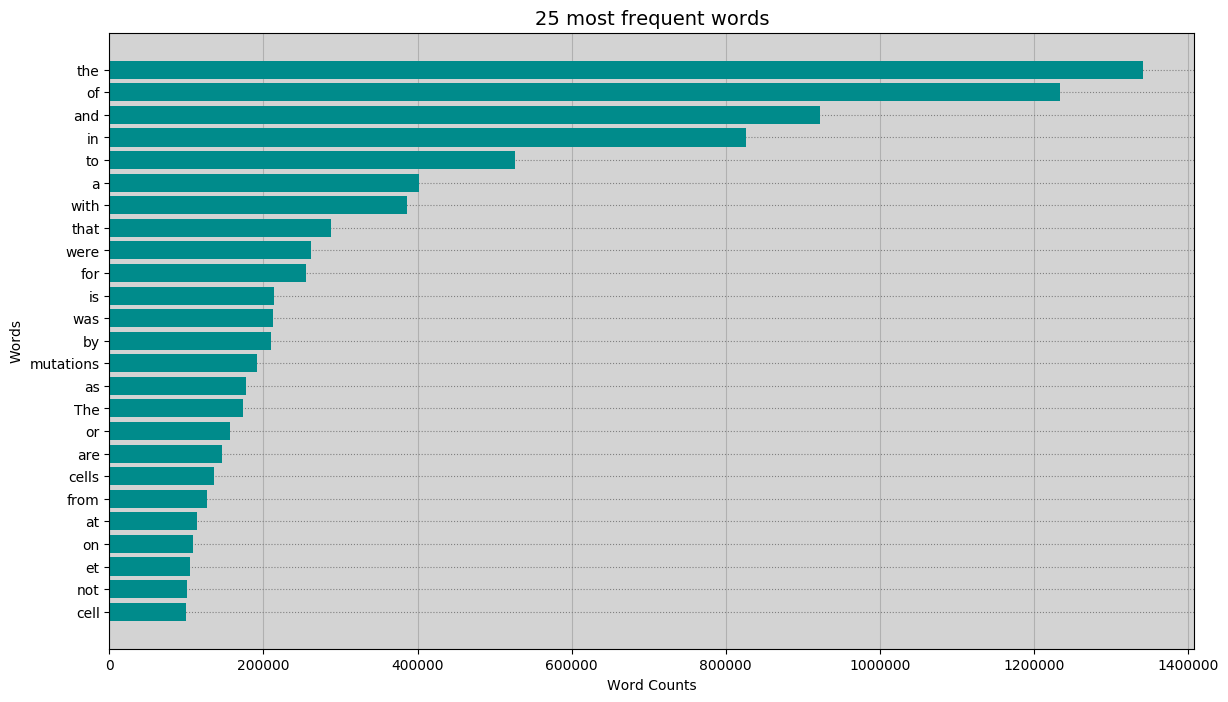

In [76]:
# plt.rcdefaults()
plt.figure(figsize=(14,8))
ax = plt.subplot()

y_pos = np.arange(len(sorted_word_list_top_25))

ax.barh(y_pos, sorted(word_counts,reverse=True), align='center', color='DarkCyan')
ax.set_facecolor('lightgray')
ax.set_yticks(y_pos)
ax.set_yticklabels(wordlist)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylabel('Words')
ax.set_xlabel('Word Counts')
ax.set_title('25 most frequent words', fontsize= 14)
ax = plt.gca()
ax.xaxis.grid()
ax.yaxis.grid(color='gray', linestyle='dotted')
ax.set_axisbelow(True)

plt.show()

### Estudando agora os n-grams presentes no texto:

In [31]:
from nltk import ngrams

def unique_ngrams(text, n):
    n_grams = ngrams(text.split(), n)
    uniquengrams = {}
    for n_gram in n_grams:
        n_gram = ' '.join(n_gram)
        if n_gram not in uniquengrams:
            uniquengrams[n_gram] = 1
        else:
            uniquengrams[n_gram] += 1
    return uniquengrams

In [32]:
Counter(unique_ngrams(train.Text[2],2)).most_common(20)

[('in the', 36),
 ('of the', 34),
 ('of c-CBL', 28),
 ('in lung', 22),
 ('and the', 21),
 ('mutations in', 17),
 ('to the', 17),
 ('c-CBL mutations', 17),
 ('lung cancer', 16),
 ('the c-CBL', 15),
 ('RING finger', 13),
 ('cells were', 13),
 ('with the', 10),
 ('MET or', 10),
 ('or EGFR', 10),
 ('at the', 10),
 ('the RING', 9),
 ('in a', 9),
 ('number of', 9),
 ('EGFR and', 8)]

<a id="Cleaning_Data"></a>
### Cleaning Data

Decapitalizing text, removing punctuation and stop-words, transliterating utf-8 to ascii:

In [83]:
# from sklearn.feature_extraction import text
# from unidecode import unidecode
# import nltk
# from nltk.stem import WordNetLemmatizer

# lemma = WordNetLemmatizer()

# sw_toadd = ['et', 'al', 'figure', 'fig', 'table', 'data', 'analysis', 'analyze', 'study', 
#             'method', 'result', 'author', 'find', 'found', 'show', 'perform', 'demonstrate',
#             'evaluate', 'discuss', 'google', 'scholar', 'pubmed', 'web', 'science', 'crossref',
#             'supplementary', 'interestingly', 'and/or', 'andor', 'download', 'pptfig']
# stop_words = set(text.ENGLISH_STOP_WORDS.union(sw_toadd))

# def process_text(df, column_name):
#     for row in range(len(df)):
#         for p in list("!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~"):
#             df.loc[row,column_name] = df.loc[row,column_name].replace(p,'') #removing punctuation
#             df.loc[row,column_name] = ' '.join([word for word in (df.loc[row,column_name]).lower().split() if word not in stop_words]) #removing stopwords and decapitalizing
#             splitted = df.loc[row,column_name].split()
#             splittedtxt = []
#             for i in splitted:
#                 splittedtxt.append(lemma.lemmatize(i))
#             df.loc[row,column_name] = ' '.join(splittedtxt) 
#             # Para tornar o dataframe num h2oFrame é necessário remover os caracteres non-ascii
#             df.loc[row,column_name] = unidecode(df.loc[row,column_name]) # returns utf-8 transliterations to ascii encoding (e.g. Â -> A ou € -> EUR)
#     return df

In [84]:
# traindf = process_text(traindf, "Text")
# traindf.to_csv('processed_text_train.csv', encoding='utf-8')

In [85]:
# testdf = process_text(testdf, "Text")
# testdf.to_csv('processed_text_test.csv', encoding='utf-8')

In [86]:
# mergedtextdf = pd.concat([traindf.loc[:,"Text"], testdf.loc[:,"Text"]])
# mergedtextdf = mergedtextdf.reset_index()
# for i in range(len(mergedtextdf)):
#     mergedtextdf.loc[i,"Text"] = unidecode(mergedtextdf.loc[i,"Text"])
# mergedtextdf.to_csv('processed_mergedtext.csv', encoding='utf-8')

In [2]:
trainingdf = pd.read_csv('processed_text_train.csv').loc[:,["ID","Gene","Variation","Class","Text"]].copy()
testingdf = pd.read_csv('processed_text_test.csv').loc[:,["ID","Gene","Variation","Text"]].copy()
mergedtextdf = pd.read_csv('processed_mergedtext.csv').loc[:,["index", "Text"]].copy()
mergedgenedf = pd.concat([trainingdf.loc[:,["ID", "Gene"]], testingdf.loc[:,["ID", "Gene"]]])

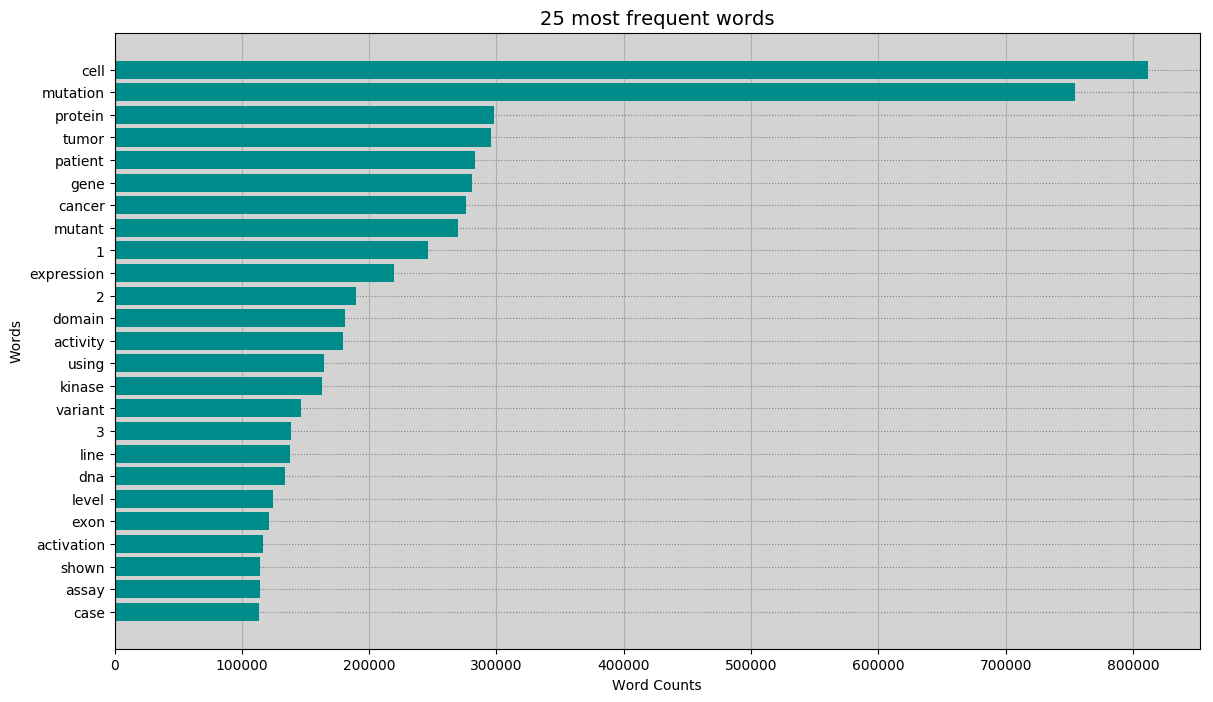

In [88]:
import operator

xword_list_top_25 = dict(most_common_words(mergedtextdf).most_common(25))
xsorted_word_list_top_25 = sorted(xword_list_top_25.items(), key=operator.itemgetter(1), reverse=True)
xtopwords = dict(xsorted_word_list_top_25)
xword_counts = xtopwords.values()
xwordlist = []
for i in xsorted_word_list_top_25:
    xwordlist.append(i[0])
    
# plt.rcdefaults()
plt.figure(figsize=(14,8))
ax = plt.subplot()

xy_pos = np.arange(len(xsorted_word_list_top_25))

ax.barh(y_pos, sorted(xword_counts,reverse=True), align='center', color='DarkCyan')
ax.set_facecolor('lightgray')
ax.set_yticks(xy_pos)
ax.set_yticklabels(xwordlist)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylabel('Words')
ax.set_xlabel('Word Counts')
ax.set_title('25 most frequent words', fontsize= 14)
ax = plt.gca()
ax.xaxis.grid()
ax.yaxis.grid(color='gray', linestyle='dotted')
ax.set_axisbelow(True)

plt.show()

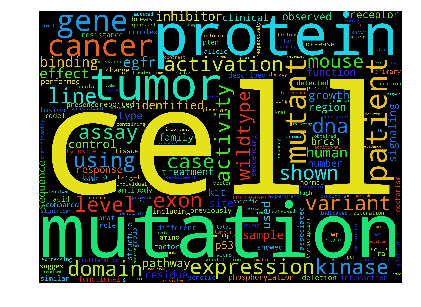

In [43]:
%matplotlib inline

from wordcloud import WordCloud

#Convert all the required text into a single string here and store them in word_string. You can specify fonts, stopwords, background color and other options
word_string = ""
for i in mergedtextdf.Text:
    word_string += i

wordcloud = WordCloud(background_color='black',
                          width=2000,
                          height=1500
                         ).generate(word_string)

plt.figure(figsize=(20,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

[(go up)](#Index)
***
<a id="Feature_Engineering"></a>
<div class="alert alert-block alert-info"><font size=6><b>2. Feature Engineering</b></font></div>

<a id="Text"></a>
### Text - Feature Engineering

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer = TfidfVectorizer(stop_words=None, ngram_range=(1,2), max_features=275)

txt_tfidf = tfidfvectorizer.fit_transform(mergedtextdf.Text)
textfeaturesdf = pd.DataFrame(txt_tfidf.toarray())
textfeaturesdf.columns = tfidfvectorizer.get_feature_names()

In [6]:
textfeatures = list(textfeaturesdf.columns)

extraindo agora features do trainingdf e do testingdf

In [7]:
vect = TfidfVectorizer(vocabulary=textfeatures)

trainvect = vect.fit_transform(trainingdf.Text)
testvect = vect.fit_transform(testingdf.Text)

trainingfeaturesdf = pd.DataFrame(trainvect.toarray())
trainingfeaturesdf.columns = vect.get_feature_names()

testingfeaturesdf = pd.DataFrame(testvect.toarray())
testingfeaturesdf.columns = vect.get_feature_names()

Juntando as features nos dfs e retirando o "Text":

In [8]:
trainingdf = pd.concat([trainingdf.loc[:,["ID","Gene","Variation","Class"]],trainingfeaturesdf], axis=1)
testingdf = pd.concat([testingdf.loc[:,["ID","Gene","Variation"]],testingfeaturesdf], axis=1)

<a id="Variation"></a>
### Variation - Feature Engineering

In [9]:
mergedvarsdf = pd.concat([trainingdf.loc[:,"Variation"], testingdf.loc[:,"Variation"]])
mergedvarsdf = mergedvarsdf.reset_index()

[*simple_var*] Criando feature com Variation do tipo ___^[A-Z]\d{1,7}[A-Z]\$___ ou ___^[A-Z]\d{1,7}\\*\$___ ou ___^\\*\d{1,7}[A-Z]\$___ (variation simples):

In [10]:
simplevars = ((mergedvarsdf["Variation"].str.contains(r'^[A-Z]\d{1,7}[A-Z]$|^[A-Z]\d{1,7}\*\$|^\*\d{1,7}[A-Z]$').values).copy()).tolist()
for i in range(len(simplevars)):
    simplevars[i] = int(simplevars[i] == True)

In [11]:
simplevarstrain = ((trainingdf["Variation"].str.contains(r'^[A-Z]\d{1,7}[A-Z]$|^[A-Z]\d{1,7}\*$|^\*\d{1,7}[A-Z]$').values)).tolist()
simplevarstest = ((testingdf["Variation"].str.contains(r'^[A-Z]\d{1,7}[A-Z]$|^[A-Z]\d{1,7}\*$|^\*\d{1,7}[A-Z]$').values)).tolist()

for i in range(len(simplevarstrain)):
    simplevarstrain[i] = int(simplevarstrain[i] == True) #convertendo True em 1

for i in range(len(simplevarstest)):
    simplevarstest[i] = int(simplevarstest[i] == True) #convertendo True em 1
    
trainingdf["simple_var"] = np.asarray(simplevarstrain)
testingdf["simple_var"] = np.asarray(simplevarstest)

[*firstsimple_var*] Criando feature com primeira letra (AA) da simple_var:

In [12]:
trainingdf["firstsimple_var"] = trainingdf.loc[trainingdf.simple_var==1,"Variation"].str[0]
for i in range(len(trainingdf)):
    if r'*' in str(trainingdf.loc[i, "firstsimple_var"]):
        trainingdf.loc[i, "firstsimple_var"] = np.nan
        
testingdf["firstsimple_var"] = testingdf.loc[testingdf.simple_var==1,"Variation"].str[0]
for i in range(len(testingdf)):
    if r'*' in str(testingdf.loc[i, "firstsimple_var"]):
        testingdf.loc[i, "firstsimple_var"] = np.nan

[*lastsimple_var*] Criando feature com última letra (AA) da simple_var:

In [13]:
trainingdf["lastsimple_var"] = trainingdf.loc[trainingdf.simple_var==1,"Variation"].str[-1]
for i in range(len(trainingdf)):
    if r'*' in str(trainingdf.loc[i, "lastsimple_var"]):
        trainingdf.loc[i, "lastsimple_var"] = np.nan

testingdf["lastsimple_var"] = testingdf.loc[testingdf.simple_var==1,"Variation"].str[-1]
for i in range(len(testingdf)):
    if r'*' in str(testingdf.loc[i, "lastsimple_var"]):
        testingdf.loc[i, "lastsimple_var"] = np.nan

[*deletion_var*] Criando feature com Variation do tipo ___Deletion___:

In [14]:
deletionvarstrain = ((trainingdf["Variation"].str.contains(r'Deletion|del', case=False).values)).tolist()
deletionvarstest = ((testingdf["Variation"].str.contains(r'Deletion|del', case=False).values)).tolist()

for i in range(len(deletionvarstrain)):
    deletionvarstrain[i] = int(deletionvarstrain[i] == True) #convertendo True em 1

for i in range(len(deletionvarstest)):
    deletionvarstest[i] = int(deletionvarstest[i] == True) #convertendo True em 1

trainingdf["deletion_var"] = np.asarray(deletionvarstrain)
testingdf["deletion_var"] = np.asarray(deletionvarstest)

[*amplification_var*] Criando feature com Variation do tipo ___Amplification___:

In [15]:
amplificationvarstrain = ((trainingdf["Variation"].str.contains(r'Amplification', case=False).values)).tolist()
amplificationvarstest = ((testingdf["Variation"].str.contains(r'Amplification', case=False).values)).tolist()

for i in range(len(amplificationvarstrain)):
    amplificationvarstrain[i] = int(amplificationvarstrain[i] == True) #convertendo True em 1

for i in range(len(amplificationvarstest)):
    amplificationvarstest[i] = int(amplificationvarstest[i] == True) #convertendo True em 1

trainingdf["amplification_var"] = np.asarray(amplificationvarstrain)
testingdf["amplification_var"] = np.asarray(amplificationvarstest)

[*overexpression_var*] Criando feature com Variation do tipo ___Overexpression___:

In [16]:
overexpressionvarstrain = ((trainingdf["Variation"].str.contains(r'Overexpression', case=False).values)).tolist()
overexpressionvarstest = ((testingdf["Variation"].str.contains(r'Overexpression', case=False).values)).tolist()

for i in range(len(overexpressionvarstrain)):
    overexpressionvarstrain[i] = int(overexpressionvarstrain[i] == True) #convertendo True em 1

for i in range(len(overexpressionvarstest)):
    overexpressionvarstest[i] = int(overexpressionvarstest[i] == True) #convertendo True em 1

trainingdf["overexpression_var"] = np.asarray(overexpressionvarstrain)
testingdf["overexpression_var"] = np.asarray(overexpressionvarstest)

[*fusion_var*] Criando feature com Variation do tipo ___Fusion___:

In [17]:
fusionvarstrain = ((trainingdf["Variation"].str.contains(r'Fusion', case=False).values)).tolist()
fusionvarstest = ((testingdf["Variation"].str.contains(r'Fusion', case=False).values)).tolist()

for i in range(len(fusionvarstrain)):
    fusionvarstrain[i] = int(fusionvarstrain[i] == True) #convertendo True em 1

for i in range(len(fusionvarstest)):
    fusionvarstest[i] = int(fusionvarstest[i] == True) #convertendo True em 1

trainingdf["fusion_var"] = np.asarray(fusionvarstrain)
testingdf["fusion_var"] = np.asarray(fusionvarstest)

[*truncation_var*] Criando feature com Variation do tipo ___trunc___:

In [18]:
truncationvarstrain = ((trainingdf["Variation"].str.contains(r'trunc', case=False).values)).tolist()
truncationvarstest = ((testingdf["Variation"].str.contains(r'trunc', case=False).values)).tolist()

for i in range(len(truncationvarstrain)):
    truncationvarstrain[i] = int(truncationvarstrain[i] == True) #convertendo True em 1

for i in range(len(truncationvarstest)):
    truncationvarstest[i] = int(truncationvarstest[i] == True) #convertendo True em 1

trainingdf["truncation_var"] = np.asarray(truncationvarstrain)
testingdf["truncation_var"] = np.asarray(truncationvarstest)

[*insertion_var*] Criando feature com Variation do tipo ___ins___:

In [19]:
insertionvarstrain = ((trainingdf["Variation"].str.contains(r'ins').values)).tolist()
insertionvarstest = ((testingdf["Variation"].str.contains(r'ins').values)).tolist()

for i in range(len(insertionvarstrain)):
    insertionvarstrain[i] = int(insertionvarstrain[i] == True) #convertendo True em 1

for i in range(len(insertionvarstest)):
    insertionvarstest[i] = int(insertionvarstest[i] == True) #convertendo True em 1

trainingdf["insertion_var"] = np.asarray(insertionvarstrain)
testingdf["insertion_var"] = np.asarray(insertionvarstest)

[*frameshift_var*] Criando feature com Variation do tipo ___fs___:

In [20]:
fsvarstrain = ((trainingdf["Variation"].str.contains(r'fs').values)).tolist()
fsvarstest = ((testingdf["Variation"].str.contains(r'fs').values)).tolist()

for i in range(len(fsvarstrain)):
    fsvarstrain[i] = int(fsvarstrain[i] == True) #convertendo True em 1

for i in range(len(fsvarstest)):
    fsvarstest[i] = int(fsvarstest[i] == True) #convertendo True em 1

trainingdf["frameshift_var"] = np.asarray(fsvarstrain)
testingdf["frameshift_var"] = np.asarray(fsvarstest)

[*splicing_var*] Criando feature com Variation do tipo ___splice___:

In [21]:
splicevarstrain = ((trainingdf["Variation"].str.contains(r'splice', case=False).values)).tolist()
splicevarstest = ((testingdf["Variation"].str.contains(r'splice', case=False).values)).tolist()

for i in range(len(splicevarstrain)):
    splicevarstrain[i] = int(splicevarstrain[i] == True) #convertendo True em 1

for i in range(len(splicevarstest)):
    splicevarstest[i] = int(splicevarstest[i] == True) #convertendo True em 1

trainingdf["splicing_var"] = np.asarray(splicevarstrain)
testingdf["splicing_var"] = np.asarray(splicevarstest)

[*duplication_var*] Criando feature com Variation do tipo ___dup___:

In [22]:
duplicationvarstrain = ((trainingdf["Variation"].str.contains(r'dup').values)).tolist()
duplicationvarstest = ((testingdf["Variation"].str.contains(r'dup').values)).tolist()

for i in range(len(duplicationvarstrain)):
    duplicationvarstrain[i] = int(duplicationvarstrain[i] == True) #convertendo True em 1

for i in range(len(duplicationvarstest)):
    duplicationvarstest[i] = int(duplicationvarstest[i] == True) #convertendo True em 1

trainingdf["duplication_var"] = np.asarray(duplicationvarstrain)
testingdf["duplication_var"] = np.asarray(duplicationvarstest)

[*methylation_var*] Criando feature com Variation do tipo ___methyl___:

In [23]:
methylationvarstrain = ((trainingdf["Variation"].str.contains(r'methyl', case=False).values)).tolist()
methylationvarstest = ((testingdf["Variation"].str.contains(r'methyl', case=False).values)).tolist()

for i in range(len(methylationvarstrain)):
    methylationvarstrain[i] = int(methylationvarstrain[i] == True) #convertendo True em 1

for i in range(len(methylationvarstest)):
    methylationvarstest[i] = int(methylationvarstest[i] == True) #convertendo True em 1

trainingdf["methylation_var"] = np.asarray(methylationvarstrain)
testingdf["methylation_var"] = np.asarray(methylationvarstest)

<a id="Gene"></a>
### Gene - Feature Engineering

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

gene_vect = CountVectorizer(analyzer=u'char', ngram_range=(2, 8), max_features=150)

gene_countvect = gene_vect.fit_transform(mergedgenedf.Gene)
genefeaturesdf = pd.DataFrame(gene_countvect.toarray())
genefeaturesdf.columns = gene_vect.get_feature_names()

genefeatures = list(genefeaturesdf.columns)

In [25]:
genevect = CountVectorizer(vocabulary=genefeatures, analyzer=u'char', ngram_range=(2, 8))

train_gene_vect = genevect.fit_transform(trainingdf.Gene)
test_gene_vect = genevect.fit_transform(testingdf.Gene)

traininggenefeaturesdf = pd.DataFrame(train_gene_vect.toarray())
traininggenefeaturesdf.columns = genevect.get_feature_names()

testinggenefeaturesdf = pd.DataFrame(test_gene_vect.toarray())
testinggenefeaturesdf.columns = genevect.get_feature_names()

In [26]:
trainingdf = pd.concat([trainingdf.drop(["Gene"],axis=1), traininggenefeaturesdf], axis=1)
testingdf = pd.concat([testingdf.drop(["Gene"],axis=1),testinggenefeaturesdf], axis=1)

In [27]:
trainingdf.shape

(3321, 441)

Testar strings na Variation:

In [44]:
string, casesensitive = r's', False

strtrain = (trainingdf["Variation"].str.contains(string, case=casesensitive).values).tolist()
strcount = 0
for i in range(len(strtrain)):
    strtrain[i]=int(strtrain[i]==True)
for i in range(len(strtrain)):
    strcount += strtrain[i]

strcount

KeyError: 'Variation'

In [29]:
featureemestudo = (mergedvarsdf["Variation"].str.contains(r'(?<!")eur(?!")', case=False).values).tolist() #todas as que contêm "eur"

featureemestudolist = []
for i in range(len(featureemestudo)):
    if featureemestudo[i] == True:
        featureemestudolist.append(mergedvarsdf.loc[i,"Variation"])
        
print(len(featureemestudolist))

0


### Ideias por implementar:

- Encontrar índices das palavras pretendidas no texto já processado (e.g. __"*abstract*"__, __"*discussion*"__, __"*results*"__)

- Próxima função:
 1. Encontra ocorrências da __variation__ e pega nos ~250 characters antes e depois da ocorrência.
 2. Caso a __variation__ não exista no texto, procura por __mutation__ ou __mutations__. 
 3. Se não existir, usa o texto todo na mesma.

In [39]:
def text_reduction(df):
    df["ReducedText"] = [[] for n in range(len(df))]#que seja df com 1 lista de Textos por row
    list_indexes = [[] for l in range(len(df))] #criando nested list
    for i in range(len(df)): #iterando todas as rows da df
        if df.loc[i,"Text"].find(df.loc[i,"Variation"].lower()) != -1: #i.e., se encontrar alguma Variation no seu Text
            list_indexes[i] = [m.start() for m in re.finditer(df.loc[i,"Variation"].lower(), df.loc[i,"Text"])] #saca os indices da Variation
            for k in list_indexes[i]:
                df.loc[i,"ReducedText"].append(df.loc[i,"Text"][(k-250):(k+250)]) #texto de k-250 : k+250
        else: #se nao encontrar a Variation no Text...
            if [n.start() for n in re.finditer(r'mutation|mutations', df.loc[i,"Text"])] != []: #Se encontrar a palavra mutation ou mutations
                list_indexes[i] = [n.start() for n in re.finditer(r'mutation|mutations', df.loc[i,"Text"])] #saca os indices da palavra mutation ou mutations
                for k in list_indexes[i]:
                    df.loc[i,"ReducedText"].append(df.loc[i,"Text"][(k-250):(k+250)]) #texto de k-250 : k+250
            else:
                df.loc[i,"ReducedText"].append(df.loc[i,"Text"]) #nao encontrando Variation, mutation(s), usa-se o texto todo na mesma
    return df

- [" "] Variations com **espaços**:

In [44]:
# trainingdf.loc[trainingdf.Variation.str.contains(' '), 'firstword_var'] = trainingdf.Variation.str.split().str.get(0)
# testingdf.loc[testingdf.Variation.str.contains(' '), 'firstword_var'] = testingdf.Variation.str.split().str.get(0)
# trainingdf.loc[trainingdf.Variation.str.contains(' '), 'secondword_var'] = trainingdf.Variation.str.split().str.get(1)
# testingdf.loc[testingdf.Variation.str.contains(' '), 'secondword_var'] = testingdf.Variation.str.split().str.get(1)
# trainingdf.loc[trainingdf.Variation.str.contains(' '), 'thirdword_var'] = trainingdf.Variation.str.split().str.get(2)
# testingdf.loc[testingdf.Variation.str.contains(' '), 'thirdword_var'] = testingdf.Variation.str.split().str.get(2)
# trainingdf.loc[trainingdf.Variation.str.contains(' '), 'secondword_var'] = trainingdf.Variation.str.split().str.get(1)
# testingdf.loc[testingdf.Variation.str.contains(' '), 'secondword_var'] = testingdf.Variation.str.split().str.get(1)

- Usar dicionário de Aminoácidos
- Usar feature do segundo gene nos casos de Variation = A230T-

### Criando 9 dfs (_trainingdf1_ - _trainingdf9_) com Classificação binária:

In [30]:
from sklearn.model_selection import train_test_split

trainingdf = trainingdf.drop(["Variation"], axis=1)
trainingdf = trainingdf.loc[:,~trainingdf.columns.duplicated()]
testingdf = testingdf.loc[:,~testingdf.columns.duplicated()]


for i in range(1,10):
    globals()[str("trainingdf")+str(i)] = trainingdf.copy() # .drop('ID',axis=1) antes do .copy()
    globals()[str("trainingdf")+str(i)].loc[globals()[str("trainingdf")+str(i)]["Class"]!=i,"Class"] = 0 #criando binario
    globals()[str("trainingdf")+str(i)], globals()[str("validationdf")+str(i)] = train_test_split(globals()[str("trainingdf")+str(i)], test_size = 0.15)

[(go up)](#Index)
***
<a id="H2O_Deep_Learning"></a>
<div class="alert alert-block alert-info"><font size=6><b>3. H2O Deep Learning</b></font></div>

In [47]:
# import h2o
# h2o.cluster().shutdown()

<div class="alert alert-block alert-info">While H2O Deep Learning has many parameters, it was designed to be just as easy to use as the other supervised training methods in H2O. Early stopping, automatic data standardization and handling of categorical variables and missing values and adaptive learning rates (per weight) reduce the amount of parameters the user has to specify. Often, it's just the number and sizes of hidden layers, the number of epochs and the activation function and maybe some regularization techniques.</div>

In [31]:
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

from h2o.automl import H2OAutoML

from h2o.grid.grid_search import H2OGridSearch

features_var = trainingdf.columns.str.contains(r'_var$', case=True).tolist()
_var = trainingdf.columns[features_var].tolist()

# Identifying response column name
y = "Class"
# Number of CV folds (to generate level-one data for stacking)
nfolds = 5

### Model Training - H2O's AutoML

In [59]:
for i in range(2,10):
    h2o.init(max_mem_size='14g', enable_assertions=False, port=54320+i)
    h2o.remove_all()
    globals()[str("tf")+str(i)] = h2o.H2OFrame(globals()[str("trainingdf")+str(i)]) # importa cada tf
    globals()[str("vf")+str(i)] = h2o.H2OFrame(globals()[str("validationdf")+str(i)]) # importa cada vf
    globals()[str("x")+str(i)] = globals()[str("tf")+str(i)].columns.remove(y)
    globals()[str("tf")+str(i)][y] = globals()[str("tf")+str(i)][y].asfactor() # Variáveis categóricas
    globals()[str("vf")+str(i)][y] = globals()[str("vf")+str(i)][y].asfactor()
    for j in _var:
        globals()[str("tf")+str(i)][j] = globals()[str("tf")+str(i)][j].asfactor() # Variáveis categóricas (features da Variation 1/0)
        globals()[str("vf")+str(i)][j] = globals()[str("vf")+str(i)][j].asfactor()
    globals()[str("automl")+str(i)] = H2OAutoML()
    globals()[str("automl")+str(i)].train(x=globals()[str("x")+str(i)], y=y, training_frame=globals()[str("tf")+str(i)], validation_frame=globals()[str("vf")+str(i)])
    h2o.save_model(model=globals()[str("automl")+str(i)].leader, path='saved_models/', force=True)
    h2o.cluster().shutdown()

Checking whether there is an H2O instance running at http://localhost:54322..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmpgpcmkf1w
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmpgpcmkf1w\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\Local\Temp\tmpgpcmkf1w\h2o_pedro_started_from_python.err
  Server is running at http://127.0.0.1:54322
Connecting to H2O server at http://127.0.0.1:54322... successful.


H2O cluster uptime:,02 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_pedro_1uuazh
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54322
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
H2O session _sid_9928 closed.
Checking whether there is an H2O instance running at http://localhost:54323..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmpxwd49o8e
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmpxwd49o8e\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\Local\Temp\tmpxwd49o8e\h2o_pedro_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323... success

H2O cluster uptime:,03 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_pedro_tcrq6t
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54323
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
H2O session _sid_9130 closed.
Checking whether there is an H2O instance running at http://localhost:54324..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmpxvad__2a
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmpxvad__2a\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\Local\Temp\tmpxvad__2a\h2o_pedro_started_from_python.err
  Server is running at http://127.0.0.1:54324
Connecting to H2O server at http://127.0.0.1:54324... success

H2O cluster uptime:,03 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_pedro_4ebmo3
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54324
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
H2O session _sid_9869 closed.
Checking whether there is an H2O instance running at http://localhost:54325..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmp3ymuntw3
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmp3ymuntw3\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\Local\Temp\tmp3ymuntw3\h2o_pedro_started_from_python.err
  Server is running at http://127.0.0.1:54325
Connecting to H2O server at http://127.0.0.1:54325... success

H2O cluster uptime:,03 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_pedro_e1e2e5
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54325
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
H2O session _sid_a391 closed.
Checking whether there is an H2O instance running at http://localhost:54326..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmpux1zoxg0
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmpux1zoxg0\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\Local\Temp\tmpux1zoxg0\h2o_pedro_started_from_python.err
  Server is running at http://127.0.0.1:54326
Connecting to H2O server at http://127.0.0.1:54326... success

H2O cluster uptime:,03 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_pedro_bsuw9h
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54326
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
H2O session _sid_98f5 closed.
Checking whether there is an H2O instance running at http://localhost:54327..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmpqbrznyfm
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmpqbrznyfm\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\Local\Temp\tmpqbrznyfm\h2o_pedro_started_from_python.err
  Server is running at http://127.0.0.1:54327
Connecting to H2O server at http://127.0.0.1:54327... success

H2O cluster uptime:,03 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_pedro_ggvxlo
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54327
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
H2O session _sid_87ec closed.
Checking whether there is an H2O instance running at http://localhost:54328..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmppd53gnvl
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmppd53gnvl\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\Local\Temp\tmppd53gnvl\h2o_pedro_started_from_python.err
  Server is running at http://127.0.0.1:54328
Connecting to H2O server at http://127.0.0.1:54328... success

H2O cluster uptime:,03 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_pedro_xghem9
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54328
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
H2O session _sid_a191 closed.
Checking whether there is an H2O instance running at http://localhost:54329..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmpx3627flx
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmpx3627flx\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\Local\Temp\tmpx3627flx\h2o_pedro_started_from_python.err
  Server is running at http://127.0.0.1:54329
Connecting to H2O server at http://127.0.0.1:54329... success

H2O cluster uptime:,03 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_pedro_st76l1
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54329
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
H2O session _sid_a408 closed.


### Making Predictions - H2O's AutoML

In [65]:
h2o.init(max_mem_size='14g', enable_assertions=False)
h2o.remove_all()

testf1 = h2o.H2OFrame(testingdf)
testf1 = testf1.drop(["Variation"])
for j in _var:
    testf1[j] = testf1[j].asfactor() # Variáveis categóricas (features da Variation 1/0)
model1 = h2o.load_model(path="saved_models/GBM_grid_1_AutoML_20170904_192351_model_37")
predictions1 = model1.predict(testf1).as_data_frame()
predictions1 = predictions1.drop("predict", axis=1)
predictions1.index.name = "ID"

testf2 = h2o.H2OFrame(testingdf)
testf2 = testf2.drop(["Variation"])
for j in _var:
    testf2[j] = testf2[j].asfactor() # Variáveis categóricas (features da Variation 1/0)
model2 = h2o.load_model(path="saved_models/StackedEnsemble_0_AutoML_20170904_203039")
predictions2 = model2.predict(testf2).as_data_frame()
predictions2 = predictions2.drop("predict", axis=1)
predictions2.index.name = "ID"

testf3 = h2o.H2OFrame(testingdf)
testf3 = testf3.drop(["Variation"])
for j in _var:
    testf3[j] = testf3[j].asfactor() # Variáveis categóricas (features da Variation 1/0)
model3 = h2o.load_model(path="saved_models/GLM_grid_0_AutoML_20170904_213126_model_1")
predictions3 = model3.predict(testf3).as_data_frame()
predictions3 = predictions3.drop("predict", axis=1)
predictions3.index.name = "ID"

testf4 = h2o.H2OFrame(testingdf)
testf4 = testf4.drop(["Variation"])
for j in _var:
    testf4[j] = testf4[j].asfactor() # Variáveis categóricas (features da Variation 1/0)
model4 = h2o.load_model(path="saved_models/StackedEnsemble_0_AutoML_20170904_223209")
predictions4 = model4.predict(testf4).as_data_frame()
predictions4 = predictions4.drop("predict", axis=1)
predictions4.index.name = "ID"

testf5 = h2o.H2OFrame(testingdf)
testf5 = testf5.drop(["Variation"])
for j in _var:
    testf5[j] = testf5[j].asfactor() # Variáveis categóricas (features da Variation 1/0)
model5 = h2o.load_model(path="saved_models/GBM_grid_1_AutoML_20170904_233245_model_33")
predictions5 = model5.predict(testf5).as_data_frame()
predictions5 = predictions5.drop("predict", axis=1)
predictions5.index.name = "ID"

testf6 = h2o.H2OFrame(testingdf)
testf6 = testf6.drop(["Variation"])
for j in _var:
    testf6[j] = testf6[j].asfactor() # Variáveis categóricas (features da Variation 1/0)
model6 = h2o.load_model(path="saved_models/GBM_grid_1_AutoML_20170905_003323_model_13")
predictions6 = model6.predict(testf6).as_data_frame()
predictions6 = predictions6.drop("predict", axis=1)
predictions6.index.name = "ID"

testf7 = h2o.H2OFrame(testingdf)
testf7 = testf7.drop(["Variation"])
for j in _var:
    testf7[j] = testf7[j].asfactor() # Variáveis categóricas (features da Variation 1/0)
model7 = h2o.load_model(path="saved_models/GBM_grid_1_AutoML_20170905_013407_model_57")
predictions7 = model7.predict(testf7).as_data_frame()
predictions7 = predictions7.drop("predict", axis=1)
predictions7.index.name = "ID"

testf8 = h2o.H2OFrame(testingdf)
testf8 = testf8.drop(["Variation"])
for j in _var:
    testf8[j] = testf8[j].asfactor() # Variáveis categóricas (features da Variation 1/0)
model8 = h2o.load_model(path="saved_models/GBM_grid_1_AutoML_20170905_023452_model_32")
predictions8 = model8.predict(testf8).as_data_frame()
predictions8 = predictions8.drop("predict", axis=1)
predictions8.index.name = "ID"

testf9 = h2o.H2OFrame(testingdf)
testf9 = testf9.drop(["Variation"])
for j in _var:
    testf9[j] = testf9[j].asfactor() # Variáveis categóricas (features da Variation 1/0)
model9 = h2o.load_model(path="saved_models/GBM_grid_1_AutoML_20170905_033548_model_114")
predictions9 = model9.predict(testf9).as_data_frame()
predictions9 = predictions9.drop("predict", axis=1)
predictions9.index.name = "ID"

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmpe91_6f21
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmpe91_6f21\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\Local\Temp\tmpe91_6f21\h2o_pedro_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_pedro_agsnem
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |███████████

In [66]:
h2o.cluster().shutdown()

H2O session _sid_ae58 closed.


<a id="Model_Training"></a>
### Model Training - Ensemble (Gradient Boosting Machine + Random Forest Distribution + Deep Learning Estimator)

In [32]:
for i in range(1,10):
    h2o.init(max_mem_size='14g', enable_assertions=False, port=54320+i)
    h2o.remove_all()
    globals()[str("tf")+str(i)] = h2o.H2OFrame(globals()[str("trainingdf")+str(i)]) # importa cada tf
    globals()[str("vf")+str(i)] = h2o.H2OFrame(globals()[str("validationdf")+str(i)]) # importa cada vf
    globals()[str("x")+str(i)] = globals()[str("tf")+str(i)].columns.remove(y)
    globals()[str("tf")+str(i)][y] = globals()[str("tf")+str(i)][y].asfactor() # Variáveis categóricas
    globals()[str("vf")+str(i)][y] = globals()[str("vf")+str(i)][y].asfactor()
    for j in _var:
        globals()[str("tf")+str(i)][j] = globals()[str("tf")+str(i)][j].asfactor() # Variáveis categóricas (features da Variation 1/0)
        globals()[str("vf")+str(i)][j] = globals()[str("vf")+str(i)][j].asfactor()
    globals()[str("gbm")+str(i)] = H2OGradientBoostingEstimator(distribution="bernoulli", ntrees=10, max_depth=3, min_rows=2, learn_rate=0.2, nfolds=nfolds,
                                                                fold_assignment="Modulo", keep_cross_validation_predictions=True, seed=1) # cria cada GBM
    globals()[str("gbm")+str(i)].train(x=globals()[str("x")+str(i)], y=y, training_frame=globals()[str("tf")+str(i)], validation_frame=globals()[str("vf")+str(i)]) # treina cada GBM
    globals()[str("rf")+str(i)] = H2ORandomForestEstimator(ntrees=50, nfolds=nfolds, fold_assignment="Modulo", keep_cross_validation_predictions=True, seed=1) # cria RFD 
    globals()[str("rf")+str(i)].train(x=globals()[str("x")+str(i)], y=y, training_frame=globals()[str("tf")+str(i)], validation_frame=globals()[str("vf")+str(i)]) # treina RFD
    globals()[str("dle")+str(i)] = H2ODeepLearningEstimator(distribution="bernoulli", rate=0.2, epochs=7, nfolds=nfolds, fold_assignment="Modulo", keep_cross_validation_predictions=True, seed=1) # cria DLE 
    globals()[str("dle")+str(i)].train(x=globals()[str("x")+str(i)], y=y, training_frame=globals()[str("tf")+str(i)], validation_frame=globals()[str("vf")+str(i)]) # treina DLE
    globals()[str("ensemble")+str(i)] = H2OStackedEnsembleEstimator(model_id=("my_ensemble_binomial_"+str(i)), base_models=[globals()[str("gbm")+str(i)].model_id,
                                                                                                                            globals()[str("rf")+str(i)].model_id,
                                                                                                                            globals()[str("dle")+str(i)].model_id
                                                                                                                           ])
    globals()[str("ensemble")+str(i)].train(x=globals()[str("x")+str(i)], y=y, training_frame=globals()[str("tf")+str(i)], validation_frame=globals()[str("vf")+str(i)])
    h2o.save_model(model=globals()[str("ensemble")+str(i)], path='saved_models/', force=True)
    h2o.cluster().shutdown()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmp6ibs4wkb
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmp6ibs4wkb\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\Local\Temp\tmp6ibs4wkb\h2o_pedro_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_pedro_zyqwxs
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
stackedensemble Model Build progress: |███████████████████████████████████| 100%
H2O session _sid_aaf0 closed.
Checking whether there is an H2O instance running at http://localhost:54322..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmprvtsul0r
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmprvtsul0r\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\Lo

H2O cluster uptime:,04 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_pedro_aq34tm
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54322
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
stackedensemble Model Build progress: |███████████████████████████████████| 100%
H2O session _sid_b0c1 closed.
Checking whether there is an H2O instance running at http://localhost:54323..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmptcgabh4n
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmptcgabh4n\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\Lo

H2O cluster uptime:,06 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_pedro_y54yc3
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54323
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
stackedensemble Model Build progress: |███████████████████████████████████| 100%
H2O session _sid_b419 closed.
Checking whether there is an H2O instance running at http://localhost:54324..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmphl3yo2p2
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmphl3yo2p2\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\Lo

H2O cluster uptime:,03 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_pedro_029zb1
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54324
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
stackedensemble Model Build progress: |███████████████████████████████████| 100%
H2O session _sid_bb8e closed.
Checking whether there is an H2O instance running at http://localhost:54325..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmpcoy3jxux
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmpcoy3jxux\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\L

H2O cluster uptime:,03 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_pedro_5vmyss
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54325
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
stackedensemble Model Build progress: |███████████████████████████████████| 100%
H2O session _sid_8275 closed.
Checking whether there is an H2O instance running at http://localhost:54326..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmp03p37ts9
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmp03p37ts9\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\Lo

H2O cluster uptime:,03 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_pedro_uncxdv
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54326
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
stackedensemble Model Build progress: |███████████████████████████████████| 100%
H2O session _sid_a768 closed.
Checking whether there is an H2O instance running at http://localhost:54327..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmpkycwzgno
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmpkycwzgno\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\Lo

H2O cluster uptime:,03 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_pedro_fpoktn
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54327
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
stackedensemble Model Build progress: |███████████████████████████████████| 100%
H2O session _sid_94a4 closed.
Checking whether there is an H2O instance running at http://localhost:54328..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmpntxtha53
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmpntxtha53\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\Lo

H2O cluster uptime:,06 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_pedro_8l267j
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54328
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
stackedensemble Model Build progress: |███████████████████████████████████| 100%
H2O session _sid_a90d closed.
Checking whether there is an H2O instance running at http://localhost:54329..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmpbwet9vyk
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmpbwet9vyk\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\Lo

H2O cluster uptime:,03 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_pedro_1rguab
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54329
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
stackedensemble Model Build progress: |███████████████████████████████████| 100%
H2O session _sid_8db4 closed.


<a id="Making_Predictions"></a>
### Making Predictions

In [33]:
h2o.init(max_mem_size='14g', enable_assertions=False)
h2o.remove_all()

for i in range(1,10):
    globals()[str("testf")+str(i)] = h2o.H2OFrame(testingdf)
    globals()[str("testf")+str(i)] = globals()[str("testf")+str(i)].drop(["Variation"])
    for j in _var:
        globals()[str("testf")+str(i)][j] = globals()[str("testf")+str(i)][j].asfactor() # Variáveis categóricas (features da Variation 1/0)
    globals()[str("model")+str(i)] = h2o.load_model(path='saved_models/my_ensemble_binomial_'+str(i))
    globals()[str("predictions")+str(i)] = globals()[str("model")+str(i)].predict(globals()[str("testf")+str(i)]).as_data_frame()
    globals()[str("predictions")+str(i)] = globals()[str("predictions")+str(i)].drop("predict", axis=1)
    globals()[str("predictions")+str(i)].index.name = "ID"

h2o.cluster().shutdown()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Anaconda3\envs\Python35\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pedro\AppData\Local\Temp\tmpqjij8t73
  JVM stdout: C:\Users\pedro\AppData\Local\Temp\tmpqjij8t73\h2o_pedro_started_from_python.out
  JVM stderr: C:\Users\pedro\AppData\Local\Temp\tmpqjij8t73\h2o_pedro_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_pedro_972ykk
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
Parse progress: |███████████

In [34]:
predictions = pd.DataFrame({"Class1" : predictions1.loc[:,"p1"],
                            "Class2" : predictions2.loc[:,"p2"],
                            "Class3" : predictions3.loc[:,"p3"],
                            "Class4" : predictions4.loc[:,"p4"],
                            "Class5" : predictions5.loc[:,"p5"],
                            "Class6" : predictions6.loc[:,"p6"],
                            "Class7" : predictions7.loc[:,"p7"],
                            "Class8" : predictions8.loc[:,"p8"],
                            "Class9" : predictions9.loc[:,"p9"]
                           })
predictions.index.name = "ID"

In [35]:
for i in range(len(predictions)):
    predictions.loc[i,"Total"] = (predictions.loc[i,"Class1"] + predictions.loc[i,"Class2"] + predictions.loc[i,"Class3"] +
                                  predictions.loc[i,"Class4"] + predictions.loc[i,"Class5"] + predictions.loc[i,"Class6"] +
                                  predictions.loc[i,"Class7"] + predictions.loc[i,"Class8"] + predictions.loc[i,"Class9"])

In [36]:
predictions.head()

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Total
ID,,,,,,,,,,
0,0.035062,0.087997,0.011107,0.039218,0.035634,0.024636,0.713688,0.004828,0.002892,0.955064
1,0.103455,0.083691,0.015519,0.284635,0.036627,0.031043,0.582708,0.006259,0.002892,1.146828
2,0.043247,0.110483,0.021645,0.099859,0.031687,0.038053,0.455251,0.004828,0.002892,0.807945
3,0.056378,0.313095,0.018333,0.105640,0.025874,0.027436,0.347560,0.004828,0.003521,0.902664
4,0.067269,0.079124,0.013134,0.356942,0.025682,0.032461,0.102727,0.004828,0.002892,0.685060


In [40]:
cumulative_worstauc = 0
for i in range(1,10):
    if i == 1:
        print("The AUC of the ensemble of class %s is:" % i, globals()["ensemble"+str(i)].auc(globals()["testf"+str(i)]))
        worstauc = globals()["ensemble"+str(i)].auc(globals()["testf"+str(i)])
    else:
        print("The AUC of the ensemble of class %s is:" % i, globals()["ensemble"+str(i)].auc(globals()["testf"+str(i)]))
        if float(globals()["ensemble"+str(i)].auc(globals()["testf"+str(i)])) <= float(worstauc):
            worstauc = globals()["ensemble"+str(i)].auc(globals()["testf"+str(i)])
    cumulative_worstauc += globals()["ensemble"+str(i)].auc(globals()["testf"+str(i)])
print("So, the worst AUC is %s and the mean of the multiple AUCs is %s" % (worstauc,float(cumulative_worstauc/9)))

The AUC of the ensemble of class 1 is: 0.9944899832290434
The AUC of the ensemble of class 2 is: 0.9984910093554202
The AUC of the ensemble of class 3 is: 0.9966243228538311
The AUC of the ensemble of class 4 is: 0.9969983497783825
The AUC of the ensemble of class 5 is: 0.9939079154419407
The AUC of the ensemble of class 6 is: 0.9978582215613432
The AUC of the ensemble of class 7 is: 0.9965802183335059
The AUC of the ensemble of class 8 is: 1.0
The AUC of the ensemble of class 9 is: 0.9999674044134425
So, the worst AUC is 0.9939079154419407 and the mean of the multiple AUCs is 0.9972130472185454


### Exporting submission to a .csv

In [41]:
import datetime
now = datetime.datetime.now()

predictions.to_csv(r'C:\Users\pedro\Documents\Kaggle Projects\Personalized Medicine - Redefining Cancer Treatment\output\\'+str(now.strftime("%Y-%m-%d-%H-%M"))+'_ensemble'+'.csv')

[(go up)](#Index)

***
<p style="text-align: right;">
    <font color=DarkSlateGray size=5><b>Pedro Reis</b></font> <br>
    <font color=DarkSlateGray><b>Agosto 2017</b></font> <br></p>